In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal 
import scipy.stats as stats
import tqdm

In [2]:
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['font.serif'] = []
plt.rcParams['text.usetex'] = False
#plt.rcParams['figure.figsize'] = 3.5, 2.625
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['errorbar.capsize'] = 2
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.title_fontsize'] = 12
plt.rcParams['legend.fontsize'] = 12
#plt.rcParams['legend.frameon'] = False

In [3]:
directory = "/hpcwork/zu992399/look_elsewhere/NN_test/"
generate_data = True

# Generate Data

In [4]:
def p_value_poissonpoisson_2tailed(N_data, N_BT, k=0.5):
    p_value = 1-stats.nbinom.cdf(N_data-1, N_BT, k)
    p_left = stats.nbinom.cdf(N_data, N_BT, 0.5)
    return np.min(np.array([p_value, p_left]), axis=0)*2

def p_value_poissonpoisson(N_data, N_BT, k=0.5):
    return 1-stats.nbinom.cdf(N_data-1, N_BT, k)

def p_values_from_folder(load_folder, save_folder, save_file, remove_0s=True):
    N_samples_after = np.load(load_folder+"N_samples_after.npy")
    N_samples = np.load(load_folder+"N_samples.npy")
    N_after = np.load(load_folder+"N_after.npy")
    N = np.load(load_folder+"N.npy")
    p = []
    for i in range(len(N[0])):
        if remove_0s:
            inds = np.nonzero(N_samples_after[:,i])[0]
            inds2 = np.nonzero(N_after[inds,i])[0]
            p.append(np.sort(p_value_poissonpoisson(N_after[inds,i][inds2], N_samples_after[inds,i][inds2]/N_samples[inds,i][inds2]*N[inds,i][inds2])))
        else: 
            p.append(np.sort(p_value_poissonpoisson(N_after[:,i], N_samples_after[:,i]/N_samples[:,i]*N[:,i])))
    np.save(save_folder+save_file, np.array(p))


def p_values_from_folder_multiple(load_folder, save_folder, save_file, current, remove_0s=True):
    N_samples_after = np.load(load_folder+"N_samples_after.npy")[current]
    N_samples = np.load(load_folder+"N_samples.npy")[current]
    N_after = np.load(load_folder+"N_after.npy")[current]
    N = np.load(load_folder+"N.npy")[current]
    p = []
    for i in range(len(N[0])):
        if remove_0s:
            inds = np.nonzero(N_samples_after[:,i])[0]
            inds2 = np.nonzero(N_after[inds,i])[0]
            p.append(np.sort(p_value_poissonpoisson(N_after[inds,i][inds2], N_samples_after[inds,i][inds2]/N_samples[inds,i][inds2]*N[inds,i][inds2])))
        else: 
            p.append(np.sort(p_value_poissonpoisson(N_after[:,i], N_samples_after[:,i]/N_samples[:,i]*N[:,i])))
    np.save(save_folder+save_file, np.array(p))

In [5]:
if generate_data:
    load_directory = "/hpcwork/zu992399/look_elsewhere/NN_test/kfolds_overtraining/"
    epochs = [100,200,300,400,500]
    for i,e in enumerate(epochs):
        p_values_from_folder_multiple(load_directory, directory, "p_values_overtraining_epoch"+str(e)+".npy", i)

/tmp/zu992399/login23-3_3396006/ipykernel_1858398/712356113.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(save_folder+save_file, np.array(p))


# Plot results

In [6]:
colors=["green", "blue", "red"]#, "orange"]
labels=[r"$10^{-1}$",r"$10^{-2}$"]#, r"$10^{-4}$"]
def plot_array(ax, p_values):
    for i in range(len(labels)):
        ax.plot(np.arange(1, len(p_values[i])+1)/len(p_values[i]), p_values[i], colors[i], label=labels[i])

def plot_histogram(ax, p_values, bins):
    for i in range(len(labels)):
        y, _, _ = ax.hist(p_values[i], bins=bins, histtype="step", color=colors[i], label=labels[i], density=True)

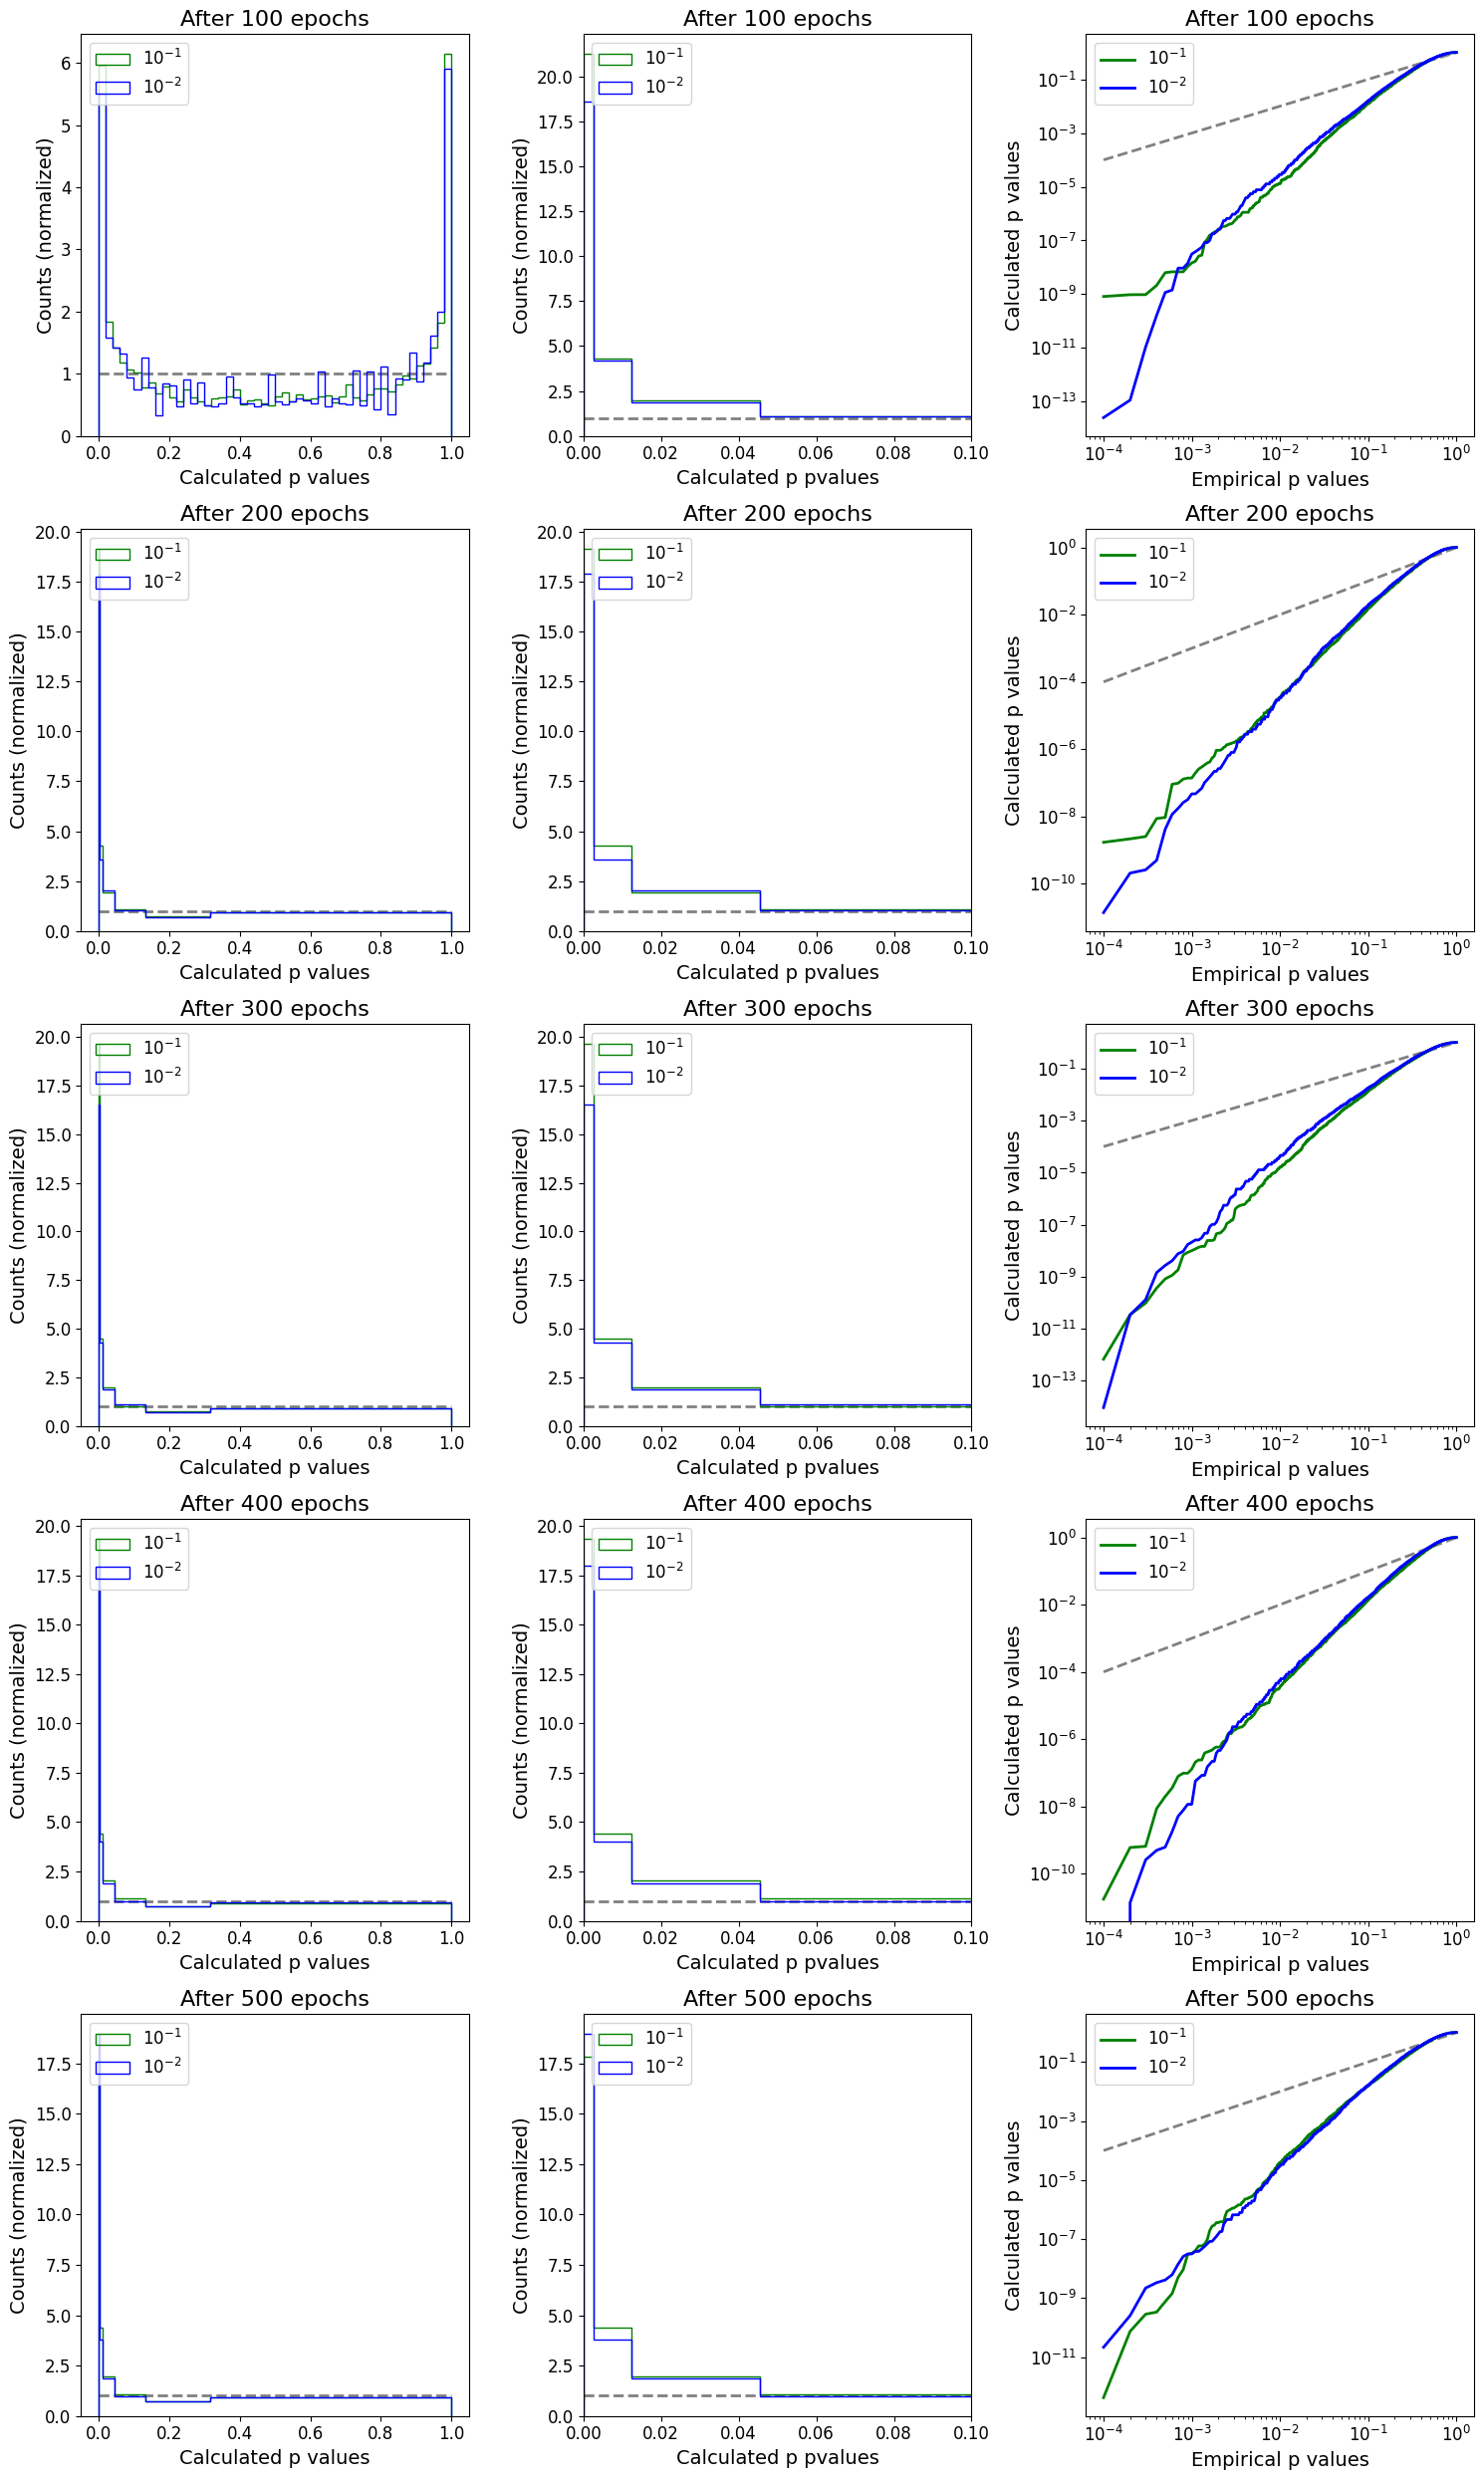

In [10]:
p100 = np.load(directory+ "p_values_overtraining_epoch100.npy", allow_pickle=True)
p200 = np.load(directory+ "p_values_overtraining_epoch100.npy", allow_pickle=True)
p300 = np.load(directory+ "p_values_overtraining_epoch100.npy", allow_pickle=True)
p400 = np.load(directory+ "p_values_overtraining_epoch100.npy", allow_pickle=True)
p500 = np.load(directory+ "p_values_overtraining_epoch100.npy", allow_pickle=True)

epochs = [100,200,300,400,500]

fig, ax = plt.subplots(5,3, figsize=(15,25))
bins_plot=np.linspace(0,1,51)

for i,e in enumerate(epochs):
    p = np.load(directory+ "p_values_overtraining_epoch"+str(e)+".npy", allow_pickle=True)

    ax[i,0].set_title("After "+str(e)+" epochs")
    ax[i,0].set_xlabel("Calculated p values")
    ax[i,0].set_ylabel("Counts (normalized)")
    ax[i,0].plot([0,1],[1,1], linestyle="dashed", color="grey")

    ax[i,1].set_title("After "+str(e)+" epochs")
    ax[i,1].set_xlabel("Calculated p pvalues")
    ax[i,1].set_ylabel("Counts (normalized)")
    ax[i,1].plot([0,1],[1,1], linestyle="dashed", color="grey")

    ax[i,2].set_title("After "+str(e)+" epochs")
    ax[i,2].set_xlabel("Empirical p values")
    ax[i,2].set_ylabel("Calculated p values")
    ax[i,2].set_xscale("log")
    ax[i,2].set_yscale("log")
    ax[i,2].plot([1e-4, 1], [1e-4, 1], color="grey", linestyle="dashed")

    plot_histogram(ax[i,0], p, bins_plot)
    ax[i,0].legend(loc="upper left")

    bins_plot=[0, 2-2*stats.norm.cdf(3), 2-2*stats.norm.cdf(2.5), 2-2*stats.norm.cdf(2), 2-2*stats.norm.cdf(1.5), 2-2*stats.norm.cdf(1), 1]
    plot_histogram(ax[i,1], p, bins_plot)
    ax[i,1].legend(loc="upper left")
    ax[i,1].set_xlim(0,0.1)

    plot_array(ax[i,2], p)
    ax[i,2].legend(loc="upper left")

fig.tight_layout()
fig.savefig("plots/NN_overtraining_kfolds.pdf")